## 1.热门商品分析

#### 数据说明：

196  242  3  881250949 

**用户196**对**商品242**的**评分为3**，**提交时间戳为881250949**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 列名
column_name_s = ['user_id','item_id', 'rating', 'timestamp'] 
# 读取数据
df_data = pd.read_csv('./data/u.data', sep='\t', names=column_name_s, encoding='latin-1')
# 打印前5行
df_data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
# 得到每个item_id出现的次数
items_rating_times = df_data['item_id'].value_counts() 
# 查看前5行
items_rating_times.head()

50     583
258    509
100    508
181    507
294    485
Name: item_id, dtype: int64

In [4]:
# 结果第一列为item_id，第二列为item_id被评分的统计次数

In [5]:
df_data[df_data['item_id'] > 1500]

,user_id,item_id,rating,timestamp
2532,314,1518,4,877891426
5290,303,1508,1,879544130
5882,295,1503,2,879517082
6739,314,1520,3,877892052
8292,286,1503,3,877534107
...,...,...,...,...
98767,782,1610,1,891500230
98955,655,1641,3,887427810
99131,919,1514,2,885059812
99177,416,1594,5,893212484


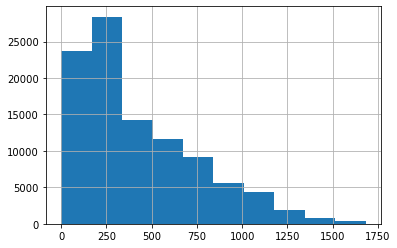

In [6]:
# 横轴为item_id，纵轴为item_id被评分的统计次数
df_data['item_id'].hist()

<BarContainer object of 1682 artists>

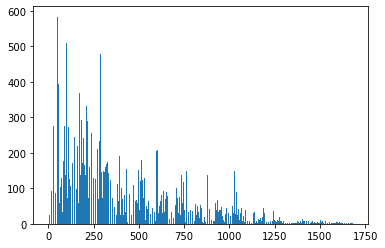

In [7]:
# 未排序之前作图效果
plt.bar(items_rating_times.index, items_rating_times)

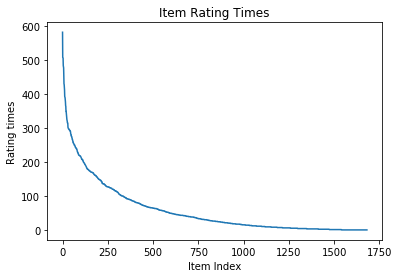

In [8]:
# 重置索引，便于画图，会覆盖原来的索引
items_rating_times.index = range(items_rating_times.count())    # .count()统计行数为1682
items_rating_times.head()

# 对每个商品的评分次数作图
plt.plot(items_rating_times)
plt.xlabel('Item Index')
plt.ylabel('Rating times')
plt.title('Item Rating Times')
plt.show()

In [16]:
# 原来的索引被替换掉了。实际数据操作时，需要保存原来的索引
# 50     583
# 258    509
# 100    508
# 181    507
# 294    485

# 0    583
# 1    509
# 2    508
# 3    507
# 4    485

In [15]:
items_rating_times.head()

0    583
1    509
2    508
3    507
4    485
Name: item_id, dtype: int64

## 总结：
**长尾效应**：Item Index**大于250**之后的大部分商品被评分的次数少，称为长尾 
`![](./长尾效应.png)`

In [9]:
%%html
<img style="float: left;" src="./长尾效应.png",width=60,height=60>

## 2.用户活跃度分析

In [10]:
users_activity = df_data['user_id'].value_counts()
users_activity.head()

405    737
655    685
13     636
450    540
276    518
Name: user_id, dtype: int64

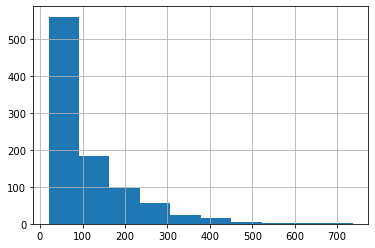

In [11]:
users_activity.hist()

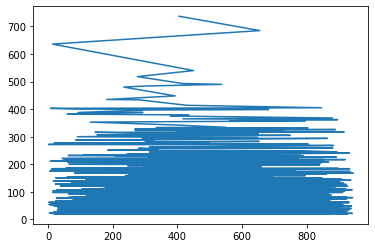

In [12]:
# 未排序之前作图效果
plt.plot(users_activity.index, users_activity)

<BarContainer object of 943 artists>

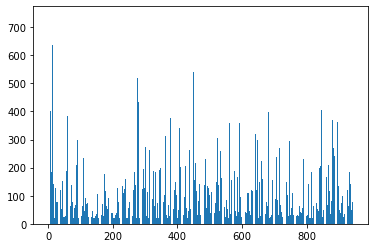

In [13]:
plt.bar(users_activity.index, users_activity)

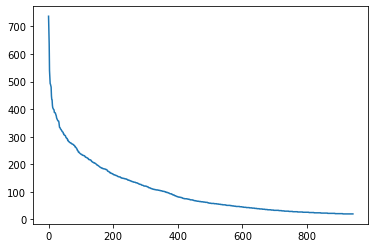

In [14]:
# 排序之后作图效果
users_activity.index = range(users_activity.count())  # 重排号码索引
plt.plot(users_activity)